# Análisis de datos extraídos de Twitter

En este cuaderno se muestra el análisis y las series de tiempo de los datos extraídos de Twitter.


Primero, importamos las bibliotecas con las que vamos a trabajar:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Definimos el estilo de las gráficas

In [2]:
sns.set(rc={'figure.figsize':(11, 5)}) 
sns.set_style("white")

Las consultas se dividieron en 6 grupos. Primero mostramos la relación de los tweets totales extraídos desde marzo 2020 hasta mayo 2021, luego se hace la presentación individual por grupo. 

## Búsqueda general

En principio, se cargan los datos que se encuentran de un archivo .CSV.; luego se pide su forma para estar al tanto de cuantos tweets se recaudaron en total.

In [75]:
df = pd.read_csv('../datos/datos_twitter/data.csv', parse_dates=['created_at'])
df.shape 

(2666, 2)

Eliminamos las filas que sean iguales ya que representan tweets repetidos.

In [76]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28T23:17:21+00:00,Venezuela: el país donde el fiscal general qui...
1,2021-04-26T05:21:31+00:00,"@the_efosa Hi, I'm a desperate son loocking fo..."
2,2021-04-19T05:30:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
3,2021-04-19T02:08:17+00:00,"Aún falta mucho, todavía los familiares de Ani..."
4,2021-04-18T22:00:00+00:00,"#VENEZUELAENELMUNDO | Es una realidad que, la ..."
...,...,...
2661,2020-09-07T21:41:29+00:00,"Venezuela muere, un caso de hoy, masculino 54 ..."
2662,2020-09-05T01:56:30+00:00,Gente de Twitter el oximetro es un aparato uti...
2663,2020-08-27T19:11:26+00:00,¿Para que sirve el oxímetro de pulso?.\n.\nPri...
2664,2020-08-24T12:21:49+00:00,@Elpapudemc Deben monitorear la saturación de ...


La siguiente función hace la conversión de la columna "created_ad" a un formato específico para ser utilizado en las series de tiempo, luego agrupa las entradas de cada día y la convierte en una serie de tiempo.

In [77]:
def counts_time_series(df):
    """Convertir la columna 'created_at' a fecha"""
    df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d', errors='coerce')
    
    """Agrupa por el día y cuenta el numero de entradas con ese día"""
    time_series_with_counts = df.groupby(df['created_at'].dt.floor('d')).size()
    
    #"""Remueve las filas que sean iguales"""
    #time_series_with_counts.drop_duplicates(keep='first')

    return time_series_with_counts

In [78]:
twitter_time_series =  counts_time_series(df)

En total se extraen 2560 tweets, luego de remover los tweets duplicados, queda un total de 2429, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:xlabel='created_at'>

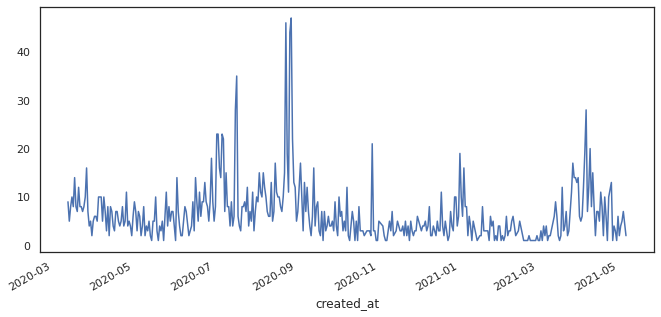

In [79]:
twitter_time_series.plot()

### Grupo 1

- infectado covid-19
- muerte covid-19

In [10]:
df = pd.read_csv('../datos/datos_twitter/twitter_1_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
df.shape 

(365, 2)

In [12]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28 11:18:54+00:00,Sumado al dolor por la muerte de Aristóbulo Is...
1,2021-04-27 13:53:51+00:00,Muy triste por la muerte del profesor Andrés S...
2,2021-04-24 17:18:23+00:00,@eloscarale *disminuye las probabilidades de c...
3,2021-04-24 14:23:13+00:00,"Éste capítulo se llama ""Danzando alrededor de ..."
4,2021-04-20 00:15:53+00:00,"Lamento la muerte del Alcalde Bastidas, como ..."
...,...,...
360,2020-03-20 19:27:51+00:00,una tos leve y no se sienta enfermo. La OMS es...
361,2020-03-19 18:00:45+00:00,Lavarte las manos puede protegerte del #Covid_...
362,2020-03-16 22:10:40+00:00,Ante la pandemia del COVID-19 tocó tapabocas p...
363,2020-03-16 21:15:04+00:00,Procure que una persona sana cuide de su masco...


In [14]:
twitter_time_series =  counts_time_series(df)

En total se extraen 365 tweets, luego de remover los tweets duplicados, queda un total de 360, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:xlabel='created_at'>

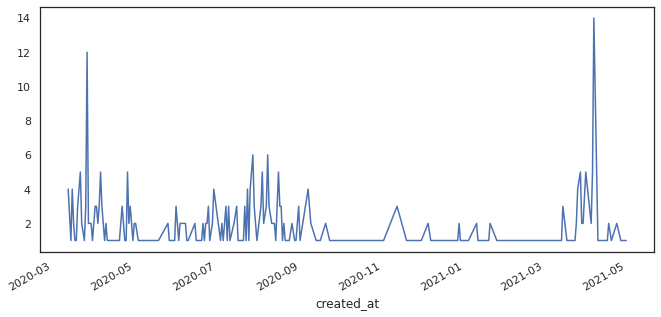

In [15]:
twitter_time_series.plot()

### Grupo 2

- bombona de oxígeno
- flujometro de oxígeno
- saturación de oxígeno
- dexametasona

In [80]:
df = pd.read_csv('../datos/datos_twitter/twitter_2_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
df.shape 

(295, 2)

In [81]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-28 17:26:59+00:00,🚑 El hijo de una amiga sufrió la picadura de u...
1,2021-04-24 13:36:31+00:00,Buenos días quien tenga información exacta y n...
2,2021-04-24 13:34:00+00:00,@VirguezFranklin Reflexione!! Quienes son los...
3,2021-04-24 13:25:07+00:00,Reflexione!! Quienes son los reales genocidas...
4,2021-04-22 14:07:09+00:00,Muchos pagan lo que no tienen por una bombona ...
...,...,...
290,2020-09-07 21:41:29+00:00,"Venezuela muere, un caso de hoy, masculino 54 ..."
291,2020-09-05 01:56:30+00:00,Gente de Twitter el oximetro es un aparato uti...
292,2020-08-27 19:11:26+00:00,¿Para que sirve el oxímetro de pulso?.\n.\nPri...
293,2020-08-24 12:21:49+00:00,@Elpapudemc Deben monitorear la saturación de ...


In [82]:
twitter_time_series =  counts_time_series(df)

En total se extraen 259 tweets, luego de remover los tweets duplicados, queda un total de 215, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:xlabel='created_at'>

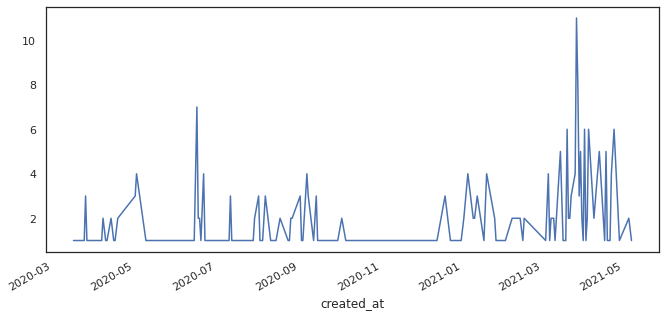

In [83]:
twitter_time_series.plot()

### Grupo 3

- GoFundMe venezuela covid-19
- recolectar dinero covid-19
- ayuda covid-19

In [84]:
df = pd.read_csv('../datos/datos_twitter/twitter_3_grupo.csv', parse_dates=['created_at']) #leer los datos, con la columna 'created at' como fecha 
df.shape

(674, 2)

In [85]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-13 22:54:38+00:00,Qué horrible que en Venezuela todo está colaps...
1,2021-04-12 19:53:10+00:00,Desde el #1Abr se han abierto 210 campañas de ...
2,2021-04-09 14:42:17+00:00,Venezuela recurre a GoFoundMe para luchar cont...
3,2021-04-06 07:08:20+00:00,My Twitter/Facebook feeds are full of GoFoundM...
4,2021-04-05 17:46:05+00:00,@Simonovis Con Razón eso explicaría que 👉 El T...
...,...,...
667,2021-01-19 18:00:48+00:00,#ServicioPublico #ServicioSocial #Gofundme #Co...
668,2021-01-17 18:05:41+00:00,Sabías que los venezolanos acuden a la creació...
671,2021-04-07 15:31:17+00:00,Buenos días se necesita con urgencia estos med...
672,2021-01-07 14:31:39+00:00,FundaRedes propone crear Comité especial para ...


In [86]:
twitter_time_series =  counts_time_series(df)

En total se extraen 649 tweets, luego de remover los tweets duplicados, queda un total de 642, los cuales se distribuyen de la siguiente manera: 

<AxesSubplot:xlabel='created_at'>

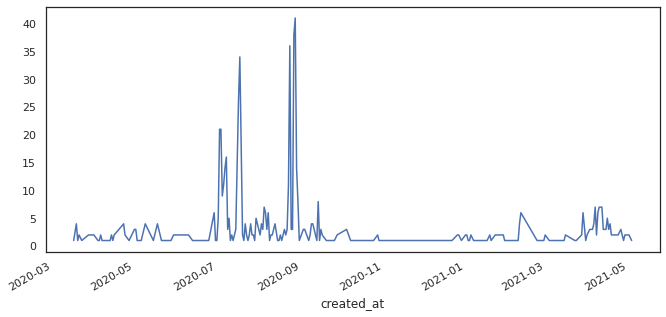

In [87]:
twitter_time_series.plot()

### Grupo 4

- servicio público

In [48]:
df = pd.read_csv('../datos/datos_twitter/twitter_4_grupo.csv', parse_dates=['created_at']) 
df.shape 

(951, 2)

In [49]:
df.drop_duplicates(keep='first')

,created_at,text
0,2020-07-27 01:15:10+00:00,#ServicioPúblico #Táchira. Se necesita con urg...
1,2020-07-26 17:03:31+00:00,¡Dios Santo!!! Esta es la situación real en #V...
2,2020-07-26 12:37:41+00:00,#ServicioPúblico https://t.co/sW2kSphw8K
3,2020-07-25 22:36:23+00:00,#ServicioPublico\nSi está en tus posibilidades...
4,2020-07-25 19:59:04+00:00,#ServicioPúblico https://t.co/OS8F7Aa9He
...,...,...
922,2021-04-19 18:47:37+00:00,URGENTE Servicio público *APOYEMOS A ALDA FRAN...
923,2021-04-10 01:33:41+00:00,Servicio Público\n\nPilar Guerra es coordinado...
924,2021-04-10 01:23:08+00:00,SERVICIO PÚBLICO | Para la Sra. Carmen Gisela ...
925,2021-03-08 01:39:05+00:00,"El ministro de Transporte , Hipólito Abreu, an..."


In [50]:
twitter_time_series =  counts_time_series(df)

En total se extraen 906 tweets, luego de remover los tweets duplicados, queda un total de 891, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:xlabel='created_at'>

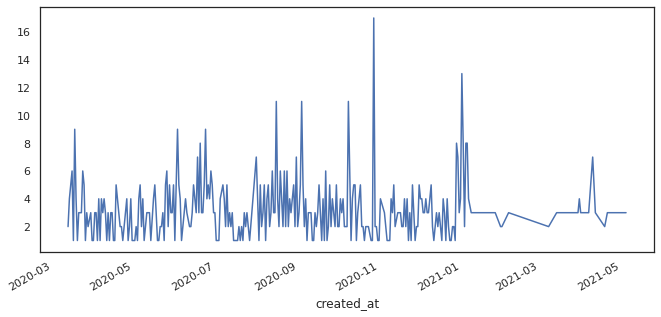

In [51]:
twitter_time_series.plot()

### Grupo 5

- UCIS 
- unidad de cuidados intensivos

In [36]:
df = pd.read_csv('../datos/datos_twitter/twitter_5_grupo.csv', parse_dates=['created_at'])  
df.shape 

(76, 2)

In [37]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-26 12:52:42+00:00,UCI DE PRIMER MUNDO✅👏🏻\n\n@EdwinRojasM: En la ...
1,2021-04-26 12:51:07+00:00,En Vivo 📻 programa La Voz De Sucre 📺\n@EdwinRo...
2,2021-04-23 13:31:15+00:00,Cumpliendo con las orientaciones precisas del ...
3,2021-04-19 13:40:36+00:00,#SALUD | Próximamente se estará inaugurando la...
4,2021-04-19 13:30:46+00:00,El líder sucrense @EdwinRojasM anunció que pr...
...,...,...
71,2021-05-03 14:59:27+00:00,Con una inversión de 180mil millones de Bs\nSe...
72,2021-05-03 14:13:10+00:00,El Gobernador @EdwinRojasM indicó que la unida...
73,2021-05-03 12:11:49+00:00,Gobernador @EdwinRojasM Siempre pensando en su...
74,2021-05-01 16:35:13+00:00,Hermana. El murió primero. En Valencia. Ella m...


In [38]:
twitter_time_series =  counts_time_series(df)

En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:xlabel='created_at'>

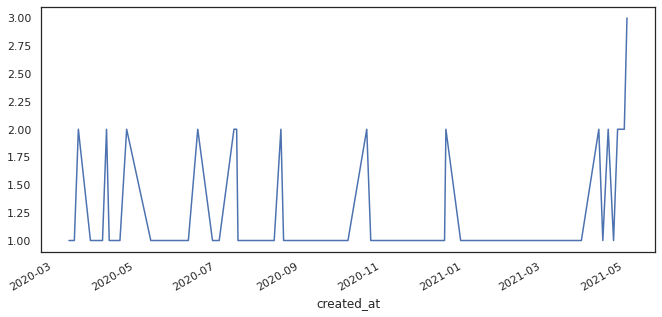

In [39]:
twitter_time_series.plot()

### Grupo 6

- tratamiento covid-19 

In [40]:
df = pd.read_csv('../datos/datos_twitter/twitter_6_grupo.csv', parse_dates=['created_at']) 
df.shape

(324, 2)

In [41]:
df.drop_duplicates(keep='first')

,created_at,text
0,2021-04-29 13:12:42+00:00,Atender a los pacientes con Covid-19 es una tr...
1,2021-04-28 21:17:54+00:00,#28Abr El padre Beltrán Sánchez superó el #Cov...
2,2021-04-26 21:55:49+00:00,#26Abr Al final de la noche del domingo #25Abr...
3,2021-04-26 13:50:57+00:00,Se entegaron 6 nuevos equipos de ventilación m...
4,2021-04-26 10:08:44+00:00,TRATAMIENTO PARA COVID-19 YA VACUNAS YA
...,...,...
319,2020-03-15 20:00:44+00:00,No se deben usar antibióticos como medio de pr...
320,2020-03-14 03:26:41+00:00,#coronapocalypse #coronavirusvenezuela #Covid_...
321,2020-03-13 19:36:45+00:00,"La Cuba ""Castro-Comunista"" a la vanguardia mu..."
322,2020-03-13 02:37:57+00:00,@joselui02124198 Así como han ocultado estadís...


In [42]:
twitter_time_series =  counts_time_series(df)

En total se extraen 76 tweets, luego de remover los tweets duplicados, queda un total de 76, los cuales se distribuyen de la siguiente manera:

<AxesSubplot:xlabel='created_at'>

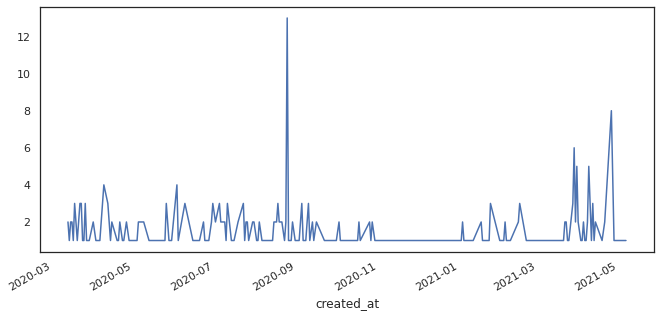

In [43]:
twitter_time_series.plot()